## part 1 builidng 5 predictive models 

OLS 
LASSO 
Random Forest 
Boosting 
CART 

## importing 

In [91]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np
import sys
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from stargazer import stargazer
from statsmodels.tools.eval_measures import mse,rmse

import os
import sys
import warnings
from pathlib import Path
from sklearn.inspection import permutation_importance
from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import partial_dependence
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
from mizani.formatters import percent_format
from patsy import dmatrices
from plotnine import *
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from statsmodels.tools.eval_measures import rmse

from sklearn.metrics import r2_score,mean_squared_error
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.tree import DecisionTreeRegressor
from collections import Counter
from IPython.display import Image, display

warnings.filterwarnings("ignore")

In [2]:

data_dir = "/Users/ghadena/Desktop/Business analytics/DA3/DA3/assignment_1/data"
path = os.path.join(data_dir,'airbnb_madrid_workfile_adj_.csv') 
df = pd.read_csv(path)
df.head()

,f_room_type,f_property_type,f_room_type2,f_neighbourhood_cleansed,usd_price_day,p_host_response_rate,n_accommodates,n_bathrooms,n_review_scores_rating,n_number_of_reviews,...,flag_days_since,flag_review_scores_rating,flag_reviews_per_month,flag_n_number_of_reviews,ln_days_since,ln_days_since2,ln_days_since3,n_days_since2,n_days_since3,ln_review_scores_rating
0,Entire,Apartment,Entire/Apt,Universidad,150.0,0,4,1.0,4.64,14,...,0,0,0,0,5.983936,35.807493,214.269759,156816.0,6.209914e+07,1.534714
1,Entire,Apartment,Entire/Apt,Universidad,137.0,0,4,1.0,4.58,31,...,0,0,0,0,5.866468,34.415447,201.897123,123904.0,4.361421e+07,1.521699
2,Entire,Apartment,Entire/Apt,Justicia,244.0,0,6,2.0,4.78,67,...,0,0,0,0,6.587550,43.395815,285.872103,525625.0,3.810781e+08,1.564441
3,Entire,Apartment,Entire/Apt,Argüelles,144.0,0,4,1.0,4.96,387,...,0,0,0,0,7.884200,62.160609,490.086666,7043716.0,1.869402e+10,1.601406
4,Entire,Apartment,Entire/Apt,Entrevías,69.0,0,4,1.0,3.73,11,...,0,0,0,0,6.133398,37.618572,230.729673,211600.0,9.733600e+07,1.316408


## EDA and sample design 
we did feature engineerng in the cleaning document 

In [3]:
df.isnull().sum().sum()

0

In [4]:
#We focus on normal apartments, n<8
df = df.loc[lambda x: x["n_accommodates"] < 8]

In [5]:
#Copy a variable - purpose later, see at variable importance
df = df.assign(n_accommodates_copy=df.n_accommodates)

In [6]:
df.describe()

,usd_price_day,p_host_response_rate,n_accommodates,n_bathrooms,n_review_scores_rating,n_number_of_reviews,n_reviews_per_month,n_minimum_nights,n_beds,n_days_since,...,flag_review_scores_rating,flag_reviews_per_month,flag_n_number_of_reviews,ln_days_since,ln_days_since2,ln_days_since3,n_days_since2,n_days_since3,ln_review_scores_rating,n_accommodates_copy
count,20233.000000,20233.0,20233.000000,20233.000000,20233.000000,20233.000000,20233.000000,20233.000000,20233.000000,20233.000000,...,20233.000000,20233.000000,20233.0,20233.000000,20233.000000,20233.000000,2.023300e+04,2.023300e+04,20233.000000,20233.000000
mean,117.980626,0.0,3.019473,1.253398,4.669453,53.026442,1.940280,7.060940,1.829931,6.282932,...,0.170415,0.170415,0.0,6.282932,40.894425,273.354686,1.725053e+06,4.461300e+09,1.534179,3.019473
std,91.768908,0.0,1.521987,0.595112,0.427763,93.815632,1.826741,17.356968,1.243126,1.191328,...,0.376006,0.376006,0.0,1.191328,13.978358,131.588942,3.234207e+06,1.158312e+10,0.135768,1.521987
min,1.000000,0.0,1.000000,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,1.000000
25%,60.000000,0.0,2.000000,1.000000,4.610000,2.000000,0.730000,1.000000,1.000000,5.710427,...,0.000000,0.000000,0.0,5.710427,32.608977,186.211182,9.060100e+04,2.727090e+07,1.528228,2.000000
50%,100.000000,0.0,3.000000,1.000000,4.760000,15.000000,1.460000,2.000000,2.000000,6.388561,...,0.000000,0.000000,0.0,6.388561,40.813717,260.740936,3.528360e+05,2.095846e+08,1.560248,3.000000
75%,147.000000,0.0,4.000000,1.000000,4.880000,61.000000,2.540000,3.000000,2.000000,7.023759,...,0.000000,0.000000,0.0,7.023759,49.333190,346.504434,1.258884e+06,1.412468e+09,1.585145,4.000000
max,999.000000,0.0,7.000000,12.000000,5.000000,1092.000000,41.220000,364.000000,40.000000,8.546364,...,1.000000,1.000000,0.0,8.546364,73.040330,624.229217,2.649161e+07,1.363523e+11,1.609438,7.000000


In [7]:
# Identify columns with only one unique value
columns_to_drop = [col for col in df.columns if df[col].nunique() == 1]
print(f"Columns to drop: {columns_to_drop}")

# Drop the identified columns
df = df.drop(columns=columns_to_drop)
print("Dropped columns with only one unique value.")

#print(data_train[["price", "usd_price_day"]].corr())
#df = df.drop(columns=["d_unnamed:59", "usd_price_day"])
df = df.drop(columns=["usd_price_day"])

Columns to drop: ['p_host_response_rate', 'd_free_residential_garage_on_premises_2_spaces', 'd_friday_included_with_your_stay', 'd_monday', 'd_peque_o_para_pizza', 'd_thursday_included_with_your_stay', 'flag_n_number_of_reviews']
Dropped columns with only one unique value.


In [8]:
#print(df.d_airconditioning.value_counts().sum())
print(df.d_view.value_counts())
df.shape

d_view
1    16898
0     3335
Name: count, dtype: int64


(20233, 237)

## Creating train and hold out sets 

In [9]:
data_train, data_test = train_test_split(df, train_size=0.7, random_state=42)
data_train.shape, data_test.shape

((14163, 237), (6070, 237))

In [10]:
basic_vars = [
    "n_accommodates",
    "n_beds",
    "n_days_since",
    "f_property_type",
    "f_room_type",
    "f_bathroom",
    "f_neighbourhood_cleansed",
]

reviews = [
    "n_number_of_reviews",
    "n_review_scores_rating",
    "flag_review_scores_rating",
]

amenities = [col for col in df if col.startswith("d_")]

X1 = [
    "n_accommodates:f_property_type",
    "f_room_type:f_property_type",
    "n_accommodates:n_bathrooms", 
    "n_accommodates:f_room_type", 
    #"n_accommodates:d_airconditioning", 
    #"n_review_scores_rating:d_pets_allowed", 
    "n_review_scores_rating:d_child_friendly", 
    "n_review_scores_rating:d_free_parking",
    "n_accommodates:d_housekeeping_included",
    "n_review_scores_rating:d_housekeeping_included",
    "d_housekeeping_included:f_property_type",
]
# with boroughs
X2 = [
    "f_property_type:f_neighbourhood_cleansed",
    "f_room_type:f_neighbourhood_cleansed",
    "n_accommodates:f_neighbourhood_cleansed",
]

predictors_1 = basic_vars
predictors_2 = basic_vars + reviews + amenities
predictors_E = basic_vars + reviews + amenities + X1 + X2

In [11]:
import re
from patsy import dmatrices

# Clean column names to remove special characters
data_train.columns = data_train.columns.str.replace(r"[^\w\s]", "_", regex=True)

# Update predictors_2 to match cleaned column names
predictors_1_cleaned = [re.sub(r"[^\w\s]", "_", col) for col in predictors_1]
predictors_2_cleaned = [re.sub(r"[^\w\s]", "_", col) for col in predictors_2]
predictors_E_cleaned = [re.sub(r"[^\w\s:]", "_", col) for col in predictors_E]

# Ensure the cleaned column names are in the dataframe
data_train = data_train.rename(columns=dict(zip(predictors_2, predictors_2_cleaned)))


In [12]:

# # Create missing interaction columns
# for var in X1 + X2:
#     if var not in data_train.columns:
#         # Split the interaction term to get the individual columns
#         col1, col2 = var.split(":")
#         # Create the interaction term
#         data_train[var] = data_train[col1] * data_train[col2]
#         print(f"Created column: {var}")
#     else:
#         print(f"Column already exists: {var}")
        
# # Check the data types of the newly created columns
# for var in X1 + X2:
#     print(f"{var}: {data_train[var].dtype}")

In [13]:
# for var in X1 + X2: 
#     if var  not in data_train.columns:
#         #print(var) 
#         data_train[var] = data_train['f_property_type'] + ":" + data_train['f_neighbourhood_cleansed']
#         print(True)
#     else:
#         print(var)
#         print(False)

## OLS 

In [14]:
predictors_list = [
    predictors_1_cleaned,
    predictors_2_cleaned,
    predictors_E_cleaned
]

# Loop through the predictors, fit the model, and extract the metrics
for i, predictors_cleaned in enumerate(predictors_list, start=1):

    # Create design matrices
    y, X = dmatrices("price ~ " + " + ".join(predictors_cleaned), data_train)

    # Fit the OLS model
    model = sm.OLS(y, X).fit()

    # Extract the R-squared value
    r_squared = model.rsquared

    # Extract the BIC value
    bic = model.bic

    # Calculate the RMSE
    rmse = np.sqrt(model.mse_resid)

    # Print the extracted values
    print(f"Model {i}:")
    print(f"R-squared: {r_squared}")
    print(f"BIC: {bic}")
    print(f"RMSE: {rmse}")
    print("\n")

Model 1:
R-squared: 0.3418964891202958
BIC: 163694.2608988179
RMSE: 74.95001931424191


Model 2:
R-squared: 0.4177532380892617
BIC: 163708.93331545134
RMSE: 70.96287831993624


Model 3:
R-squared: 0.4905625929398194
BIC: 167666.66920490016
RMSE: 67.89631864049521




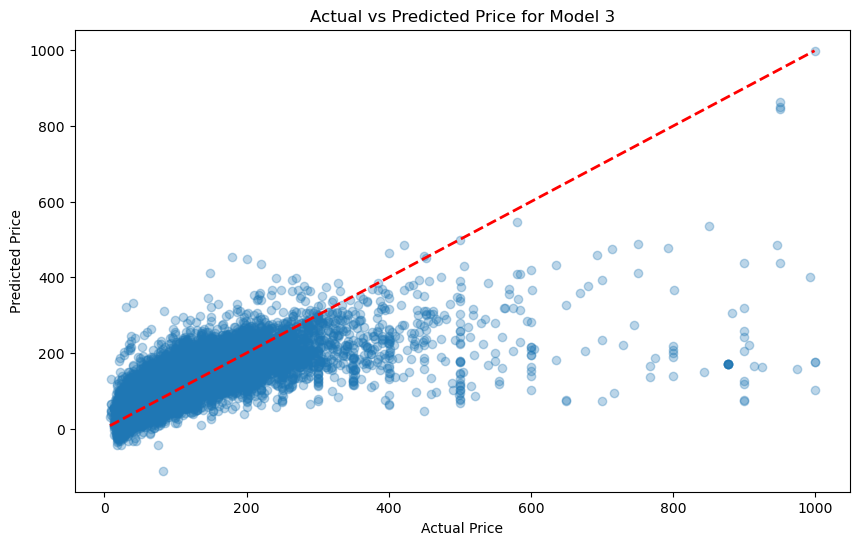

In [15]:

# Create design matrices for model 3
y, X = dmatrices("price ~ " + " + ".join(predictors_E_cleaned), data_train)

# Fit the OLS model for model 3
model_ols = sm.OLS(y, X).fit()

# Predict the values
y_hat = model_ols.predict(X)

# Plot the predicted values versus the actual values
plt.figure(figsize=(10, 6))
plt.scatter(y, y_hat, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price for Model 3')
plt.show()

## Chart 

In [16]:
def price_diff_by_variables(df, factor_var, dummy_var, factor_lab, dummy_lab):
    # Calculate statistics same way as before
    stats = df.groupby([factor_var, dummy_var]).agg(
        Mean=("price", np.mean), 
        sd=("price", np.std), 
        size=("price", "size")
    )
    stats["se"] = stats["sd"] / stats["size"] ** (1/2)
    stats["Mean_l"] = stats["Mean"] - (1.96 * stats["se"])
    stats["Mean_u"] = stats["Mean"] + (1.96 * stats["se"])
    stats = stats.drop(["sd", "size"], axis=1).reset_index()

    # Create the plot using seaborn
    # plt.figure(figsize=(10, 6))
    plt.figure()

    # Create bar plot
    ax = sns.barplot(
        data=stats,
        x=stats.columns[0],
        y='Mean',
        hue=stats.columns[1],
        palette=['indianred', 'steelblue'],
        ci=None
    )

    # Add error bars
    for i, group in enumerate(stats[stats.columns[1]].unique()):
        group_data = stats[stats[stats.columns[1]] == group]
        x = np.arange(len(group_data))

        # Adjust x positions for dodge effect
        x = x + 0.2 if i == 1 else x - 0.2
        plt.errorbar(
            x=x, 
            y=group_data['Mean'],
            yerr=[(group_data['Mean'] - group_data['Mean_l']), 
                  (group_data['Mean_u'] - group_data['Mean'])],
            fmt='none',
            color='black',
            capsize=3
        )

    # Customize the plot
    plt.xlabel(factor_lab)
    plt.ylabel('Mean Price')

    # Customize legend
    plt.legend(
        title=dummy_lab,
        bbox_to_anchor=(0.5, 1.15),
        loc='center',
        ncol=2,
        fontsize=10,
        title_fontsize=10
    )

    # Remove grid
    ax.grid(False)
    plt.show()

    return plt



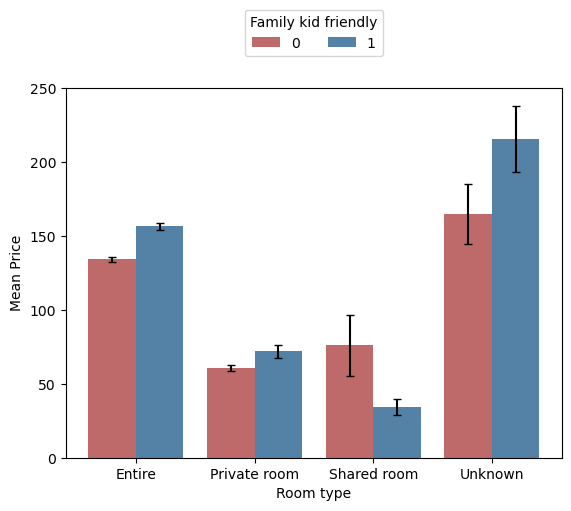

In [17]:
price_diff_by_variables(df,"f_room_type","d_child_friendly","Room type", "Family kid friendly");

## LASSO 

In [18]:
from sklearn.model_selection import GridSearchCV


In [19]:
from sklearn.linear_model import Lasso
import patsy
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import StandardScaler


#%%time

# define model
model_lasso = Lasso()
# define model evaluation method
cv = RepeatedKFold(n_splits = 5, n_repeats = 1, random_state = 20250217)
# define grid
grid = dict()
grid["alpha"] = np.arange(0.05, 1, 0.05)
# define search
search = GridSearchCV(model_lasso, grid, scoring="neg_root_mean_squared_error", cv = cv, verbose= 3) # control your output with the 'verbose' option
# perform the search
results = search.fit(X, y)

Fitting 5 folds for each of 19 candidates, totalling 95 fits
[CV 1/5] END ......................alpha=0.05;, score=-77.597 total time=   1.3s
[CV 2/5] END ......................alpha=0.05;, score=-65.629 total time=   4.8s
[CV 3/5] END ......................alpha=0.05;, score=-71.538 total time=   4.8s
[CV 4/5] END ......................alpha=0.05;, score=-67.857 total time=   6.9s
[CV 5/5] END ......................alpha=0.05;, score=-68.480 total time=   8.6s
[CV 1/5] END .......................alpha=0.1;, score=-78.292 total time=   0.8s
[CV 2/5] END .......................alpha=0.1;, score=-65.722 total time=   1.1s
[CV 3/5] END .......................alpha=0.1;, score=-72.953 total time=   1.3s
[CV 4/5] END .......................alpha=0.1;, score=-68.013 total time=   1.1s
[CV 5/5] END .......................alpha=0.1;, score=-68.021 total time=   1.3s
[CV 1/5] END .......alpha=0.15000000000000002;, score=-78.789 total time=   0.7s
[CV 2/5] END .......alpha=0.15000000000000002;, 

finding the alpha param for lasso using the train set 
The “best” alpha corresponds to the least negative RMSE (i.e., closest to zero). 
 GridSearchCV selects the alpha with the lowest validation RMSE.
✅ Since 0.05 had the best RMSE, it means that removing too many features hurt performance.
A high number of variables doesn’t always mean high alpha is needed, especially if many variables contribute small amounts of predictive power.
Impact of Alpha = 0.05
	1.	Less Regularization, More Features
	•	Since 0.05 is a small alpha, it doesn’t shrink coefficients much.
	•	The model keeps more variables in the regression.
	•	Helps prevent underfitting, meaning the model captures more detail from the data.
	2.	Better RMSE
	•	In your case, α = 0.05 had the lowest RMSE, meaning it provided the best balance between:
	•	Bias (not too simple)
	•	Variance (not overfitting)
	3.	Comparison with Higher Alpha
	•	If α were larger (e.g., 0.95), Lasso would shrink more coefficients to zero, removing some predictors.
	•	This would make the model simpler but might increase RMSE if too many useful features are removed.




In [20]:
import numpy as np

avg_rmse_per_alpha = {
    alpha: -mean_rmse for alpha, mean_rmse in zip(
        search.cv_results_["param_alpha"].data,  # Extract alpha values
        search.cv_results_["mean_test_score"]    # Extract mean negative RMSE
    )
}

print(avg_rmse_per_alpha)

{0.05: 70.22024776251274, 0.1: 70.60028208142971, 0.15000000000000002: 70.87940515188055, 0.2: 71.0950688956493, 0.25: 71.26980985485314, 0.30000000000000004: 71.43448467900204, 0.35000000000000003: 71.58812832454439, 0.4: 71.7336760579681, 0.45: 71.87869795530541, 0.5: 72.01879200174658, 0.55: 72.14640599378933, 0.6000000000000001: 72.25830768651704, 0.65: 72.37192624898827, 0.7000000000000001: 72.48133006296722, 0.75: 72.59376540480282, 0.8: 72.70486983960352, 0.8500000000000001: 72.82065984029582, 0.9: 72.94060918965167, 0.9500000000000001: 73.06164782335027}


In [21]:
# Find the best alpha (with the lowest average RMSE)
best_alpha = min(avg_rmse_per_alpha, key=avg_rmse_per_alpha.get)
best_avg_rmse = avg_rmse_per_alpha[best_alpha]

print(f"Best alpha: {best_alpha}, Best average RMSE: {best_avg_rmse}")

Best alpha: 0.05, Best average RMSE: 70.22024776251274


In [22]:
import numpy as np

lasso = search.best_estimator_  # Best model from GridSearchCV
num_nonzero = np.sum(lasso.coef_ != 0)

print(f"Number of nonzero coefficients: {num_nonzero} / {len(lasso.coef_)}")

print(search.best_estimator_.coef_.shape)  # number of features

#Lasso used 1,645 features instead of 226 because preprocessing expanded the dataset.
#Possible reasons: One-hot encoding, polynomial features, dummy variables, or text vectorization.

Number of nonzero coefficients: 226 / 1656
(1656,)


In [23]:
feature_importance = dict(zip(data_train.columns, lasso.coef_))
sorted_features = sorted(feature_importance.items(), key=lambda x: abs(x[1]), reverse=True)

print("Top 10 most important features:")
for feature, coef in sorted_features[:10]:
    print(f"{feature}: {coef:.4f}")

Top 10 most important features:
n_number_of_reviews: -44.6927
d_pool_cover: 43.1867
n_reviews_per_month: -40.2842
d_pool: -32.1143
f_neighbourhood_cleansed: 22.1134
d_pool_table: -11.2965
d_contiene_alimentos_nuestros: -7.1861
d_coffee_maker: 6.2321
n_beds: 5.3316
n_accommodates: -4.4740


In [24]:
lasso.fit(X, y)

# Predict on the test set
y_pred = lasso.predict(data_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(data_test, y_pred))
print(f"Test RMSE: {rmse:.4f}")


ValueError: could not convert string to float: 'Private room'

## CART

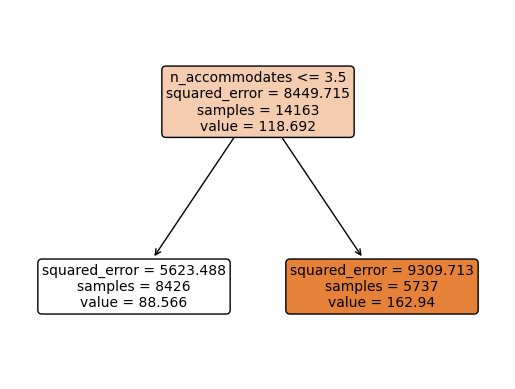

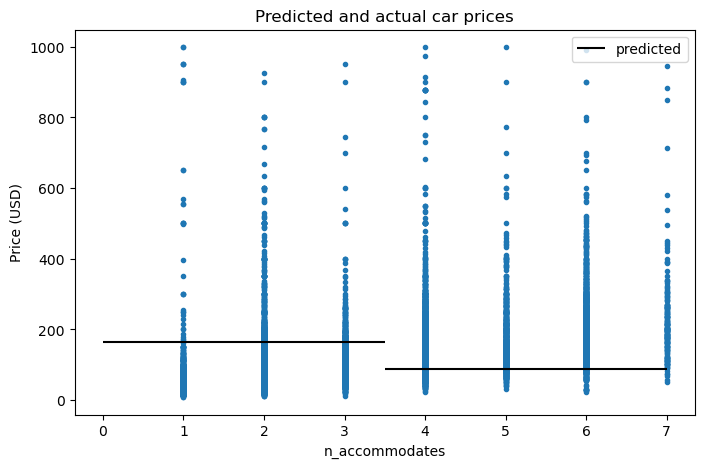

In [53]:
cart1 = DecisionTreeRegressor(random_state = 20250217, max_depth = 1)

# Note X should be a matrix instead of series, that's why we need double []
X = data_train[['n_accommodates']]
y = data_train['price']
cart1.fit(X,y)

pred_cart1 = cart1.predict(data_train[["n_accommodates"]])

rmse_cart1 = np.sqrt(mean_squared_error(data_train["price"], pred_cart1))

from sklearn import tree
tree.plot_tree(cart1, filled = True, rounded = True, feature_names=["n_accommodates"], fontsize = 10);


pred_cart1t = cart1.predict(data_train[['n_accommodates']])
cart1.tree_.threshold

cart1_cuts = cart1.tree_.threshold[cart1.tree_.threshold != -2]


df_plot = data_train.copy()
df_plot['predicted_price'] = pred_cart1t
df_plot.sort_values(by = 'n_accommodates', inplace = True)

plt.figure(figsize = (8,5))
plt.scatter(x = df_plot.n_accommodates, y = df_plot.price, marker = '.')
plt.hlines(df_plot.predicted_price.max(), 0, cart1_cuts, color = 'k')
plt.hlines(df_plot.predicted_price.min(), cart1_cuts, df_plot.n_accommodates.max(), color = 'k', label = 'predicted')
plt.legend()
plt.ylabel('Price (USD)')
plt.xlabel('n_accommodates')
plt.title('Predicted and actual car prices')
plt.show();

In [26]:
# Create design matrices for the training set
formula = "price ~ " + " + ".join(predictors_2_cleaned)
y, X = dmatrices(formula, data_train, return_type='dataframe')


cart4 = DecisionTreeRegressor(
    random_state=20250217,
    criterion="squared_error",
    min_impurity_decrease=20,
    min_samples_split=20,
)
print(cart4.fit(X, y))

y_test, X_test = dmatrices(formula, data_test, return_type='dataframe')

# Align the columns of the test set with the training set
X_test = X_test.reindex(columns=X.columns, fill_value=0)

pred_cart4 = cart4.predict(X_test)
rmse_cart4 = np.sqrt(mean_squared_error(y_test, pred_cart4))
print(rmse_cart4)

# df_cart4_var_imp = (
#     pd.DataFrame(
#         {'variable': X_test.columns, 
#          'importance': cart4.feature_importances_}
#     ).sort_values(
#         by=["importance"], ascending=False
#     ).reset_index(drop = True)
# )

# print(df_cart4_var_imp)




DecisionTreeRegressor(min_impurity_decrease=20, min_samples_split=20,
                      random_state=20250217)
74.00151816290034


In [27]:
from sklearn.linear_model import Lasso
import patsy
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import StandardScaler


#%%time

# define model
model = DecisionTreeRegressor(random_state=20250217)
# define model evaluation method
cv = RepeatedKFold(n_splits = 5, n_repeats = 1, random_state = 20250217)
# define grid
#param_grid = {'min_impurity_decrease': [0.0, 0.001, 0.01, 0.02, 0.05, 0.1, 0.25, 1.0, 5.0, 25, 50]}
param_grid = {'min_impurity_decrease': [10, 15, 20, 25, 30, 35, 40, 45, 50]}
# define search
search = GridSearchCV(model, param_grid, scoring="neg_root_mean_squared_error", cv = cv, verbose= 3) # control your output with the 'verbose' option
# perform the search
results = search.fit(X, y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ........min_impurity_decrease=10;, score=-80.262 total time=   0.1s
[CV 2/5] END ........min_impurity_decrease=10;, score=-80.752 total time=   0.1s
[CV 3/5] END ........min_impurity_decrease=10;, score=-76.525 total time=   0.1s
[CV 4/5] END ........min_impurity_decrease=10;, score=-76.850 total time=   0.1s
[CV 5/5] END ........min_impurity_decrease=10;, score=-77.704 total time=   0.1s
[CV 1/5] END ........min_impurity_decrease=15;, score=-77.413 total time=   0.1s
[CV 2/5] END ........min_impurity_decrease=15;, score=-79.983 total time=   0.1s
[CV 3/5] END ........min_impurity_decrease=15;, score=-76.628 total time=   0.1s
[CV 4/5] END ........min_impurity_decrease=15;, score=-78.473 total time=   0.1s
[CV 5/5] END ........min_impurity_decrease=15;, score=-74.677 total time=   0.1s
[CV 1/5] END ........min_impurity_decrease=20;, score=-79.160 total time=   0.1s
[CV 2/5] END ........min_impurity_decrease=20;, s

In [28]:

# Print the best parameters and the best score
print(f"Best parameters: {search.best_params_}")
print(f"Best cross-validation score: {search.best_score_}")

# Evaluate the best model on the test set
best_model = search.best_estimator_
test_score = best_model.score(X_test, y_test)
print(f"Test set score: {test_score}")

Best parameters: {'min_impurity_decrease': 20}
Best cross-validation score: -74.86458704628015
Test set score: 0.35694755559128155


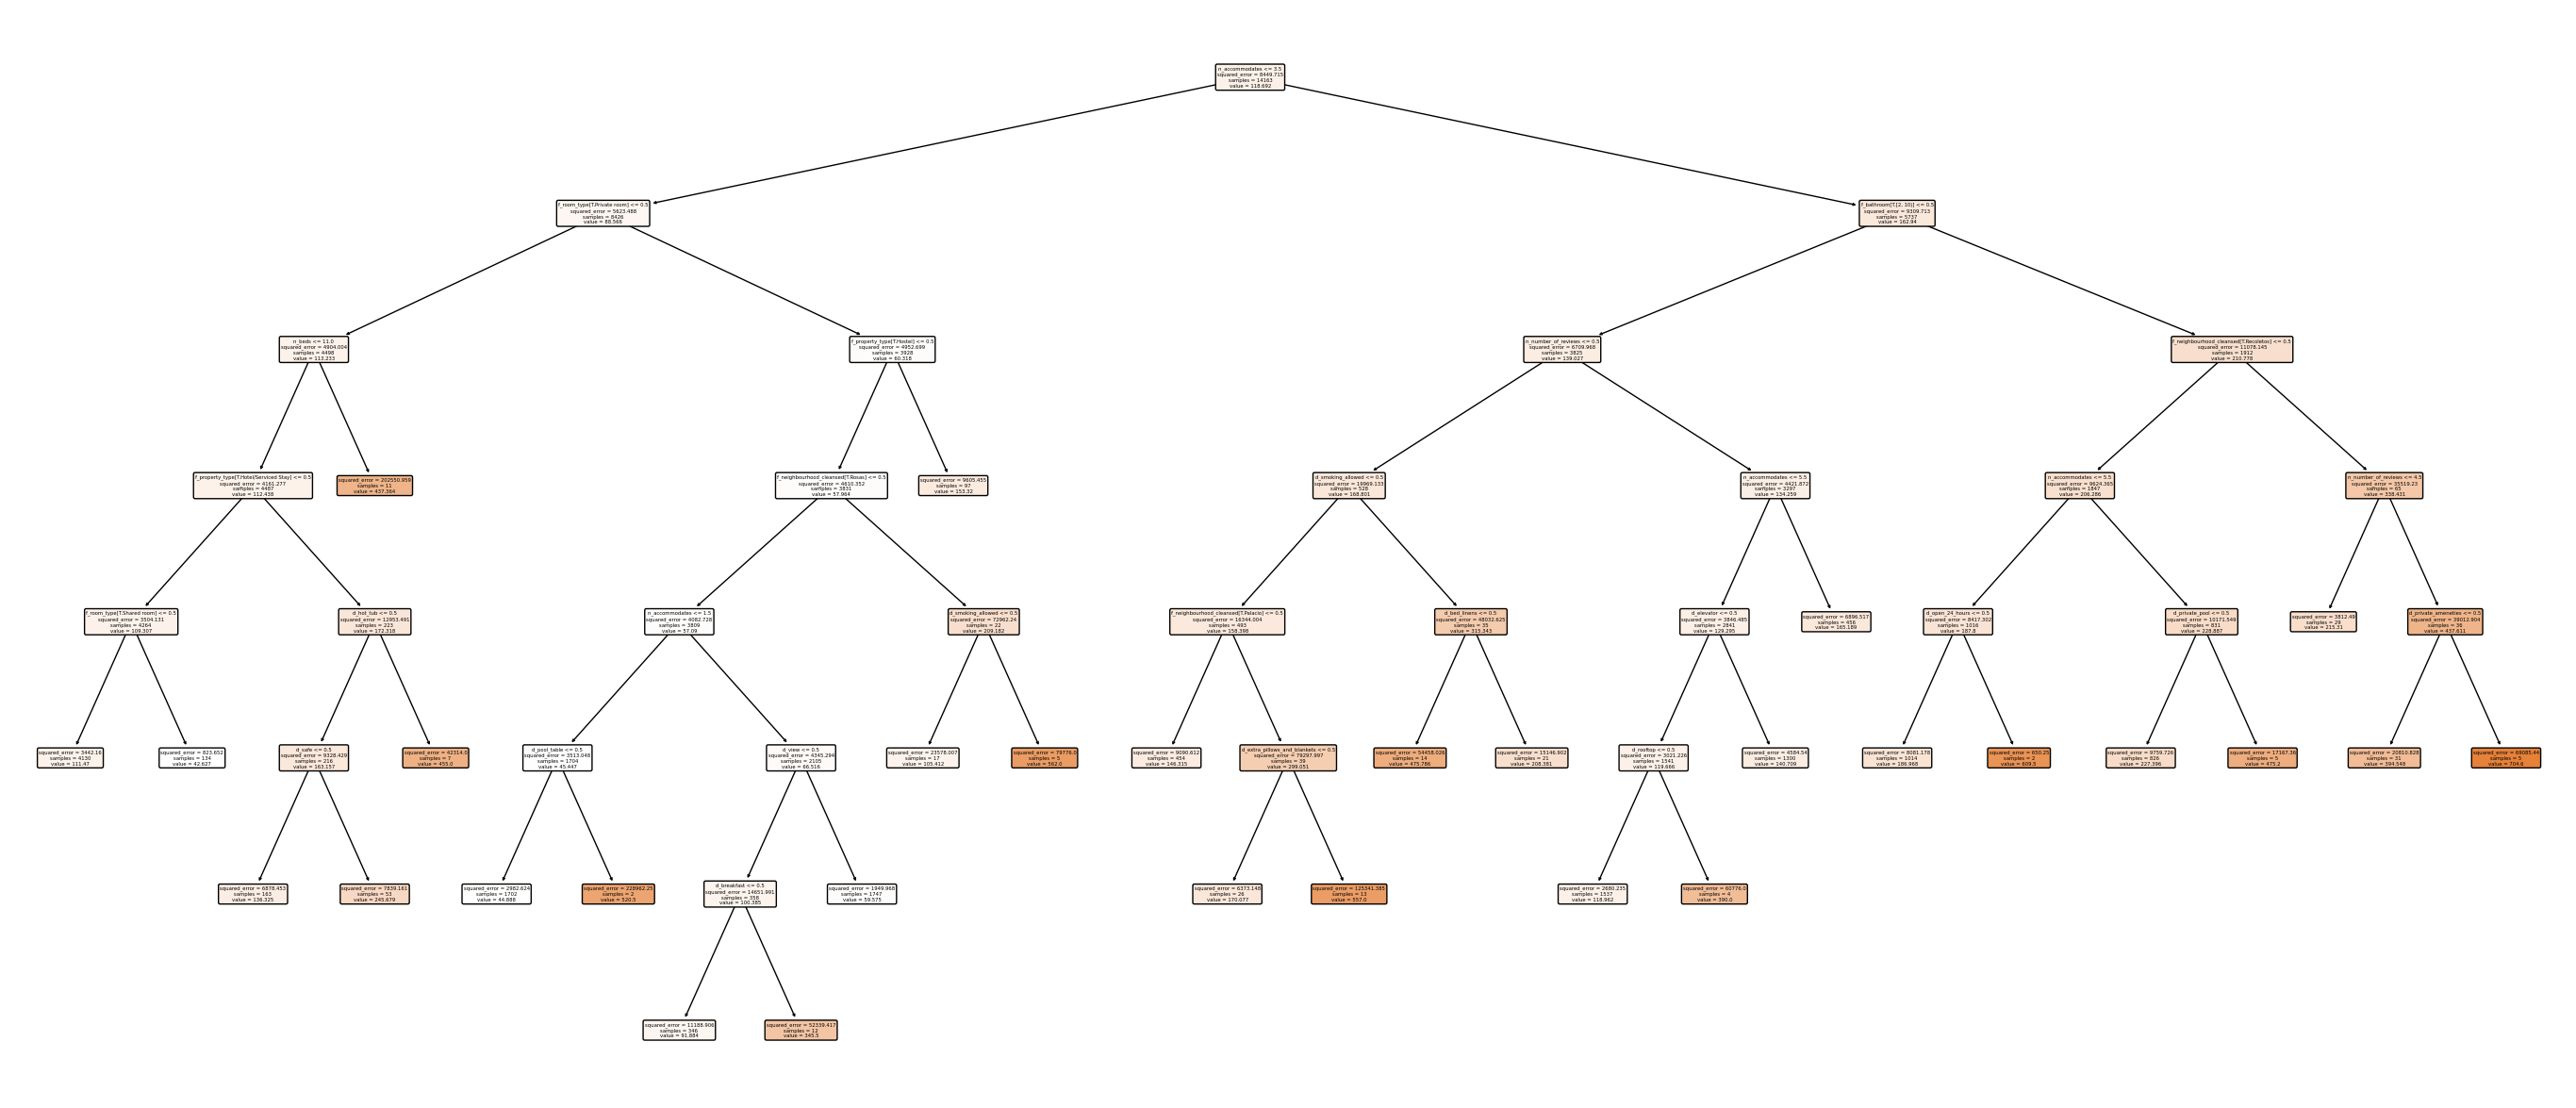

In [29]:
plt.figure(figsize = (35,15))
tree.plot_tree(cart4, filled = True, feature_names= X.columns, rounded = True);

In [30]:
df_cart4_var_imp = (
    pd.DataFrame(
        {'variable': X_test.columns, 
         'importance': cart4.feature_importances_}
    ).sort_values(
        by=["importance"], ascending=False
    ).reset_index(drop = True)
)

print(df_cart4_var_imp)

                                      variable  importance
0                               n_accommodates    0.426887
1                        f_bathroom[T.[2, 10)]    0.136158
2                  f_room_type[T.Private room]    0.121807
3                            d_smoking_allowed    0.033411
4                          n_number_of_reviews    0.027733
..                                         ...         ...
343  f_neighbourhood_cleansed[T.San Cristobal]    0.000000
344     f_neighbourhood_cleansed[T.San Andrés]    0.000000
345       f_neighbourhood_cleansed[T.Salvador]    0.000000
346     f_neighbourhood_cleansed[T.Rios Rosas]    0.000000
347                              d_bread_maker    0.000000

[348 rows x 2 columns]


## random forest 

In [59]:
y, X = dmatrices("price ~ " + " + ".join(predictors_2), data_train)

In [60]:
type(X)

patsy.design_info.DesignMatrix

In [61]:
X.shape

(14163, 348)

In [62]:
X.design_info.column_names

['Intercept',
 'f_property_type[T.Apartment]',
 'f_property_type[T.Hostel]',
 'f_property_type[T.Hotel/Serviced Stay]',
 'f_property_type[T.House]',
 'f_property_type[T.Traditional Stay]',
 'f_property_type[T.Unknown]',
 'f_room_type[T.Private room]',
 'f_room_type[T.Shared room]',
 'f_room_type[T.Unknown]',
 'f_bathroom[T.[0, 1)]',
 'f_bathroom[T.[1, 2)]',
 'f_bathroom[T.[2, 10)]',
 'f_neighbourhood_cleansed[T.Acacias]',
 'f_neighbourhood_cleansed[T.Adelfas]',
 'f_neighbourhood_cleansed[T.Aeropuerto]',
 'f_neighbourhood_cleansed[T.Aguilas]',
 'f_neighbourhood_cleansed[T.Alameda de Osuna]',
 'f_neighbourhood_cleansed[T.Almagro]',
 'f_neighbourhood_cleansed[T.Almenara]',
 'f_neighbourhood_cleansed[T.Almendrales]',
 'f_neighbourhood_cleansed[T.Aluche]',
 'f_neighbourhood_cleansed[T.Ambroz]',
 'f_neighbourhood_cleansed[T.Amposta]',
 'f_neighbourhood_cleansed[T.Apostol Santiago]',
 'f_neighbourhood_cleansed[T.Arapiles]',
 'f_neighbourhood_cleansed[T.Aravaca]',
 'f_neighbourhood_cleansed[T.

In [63]:
import math
print('The theoretical recommended number of variables: {:.2f}.'.format(math.sqrt(len(X.design_info.column_names))))

The theoretical recommended number of variables: 18.65.


In [64]:
rfr = RandomForestRegressor(random_state = 20250224)
tune_grid = {"max_features": [5, 10, 20, 25, 30], "min_samples_leaf": [5, 10, 15]}
rf_random = GridSearchCV(
    estimator = rfr,
    param_grid = tune_grid,
    cv = 5,
    scoring = "neg_root_mean_squared_error",
    verbose = 3,
)

In [65]:
rf_model = rf_random.fit(X, y.ravel())

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5] END max_features=5, min_samples_leaf=5;, score=-84.004 total time=   0.3s
[CV 2/5] END max_features=5, min_samples_leaf=5;, score=-70.968 total time=   0.2s
[CV 3/5] END max_features=5, min_samples_leaf=5;, score=-58.686 total time=   0.2s
[CV 4/5] END max_features=5, min_samples_leaf=5;, score=-80.225 total time=   0.2s
[CV 5/5] END max_features=5, min_samples_leaf=5;, score=-115.141 total time=   0.2s
[CV 1/5] END max_features=5, min_samples_leaf=10;, score=-86.521 total time=   0.2s
[CV 2/5] END max_features=5, min_samples_leaf=10;, score=-72.738 total time=   0.3s
[CV 3/5] END max_features=5, min_samples_leaf=10;, score=-60.340 total time=   0.2s
[CV 4/5] END max_features=5, min_samples_leaf=10;, score=-82.587 total time=   0.2s
[CV 5/5] END max_features=5, min_samples_leaf=10;, score=-117.827 total time=   0.2s
[CV 1/5] END max_features=5, min_samples_leaf=15;, score=-88.421 total time=   0.2s
[CV 2/5] END max_f

In [66]:
df_rf_model_cv_results = pd.DataFrame(rf_model.cv_results_)[[
    'param_max_features', 'param_min_samples_leaf', 'mean_test_score']]
df_rf_model_cv_results.columns = ['max features', 'min node size', 'RMSE']
df_rf_model_cv_results.pivot(
    index = 'max features', 
    columns = 'min node size', 
    values = 'RMSE').round(2)*-1

min node size,5,10,15
max features,,,
5,81.80,84.00,85.00
10,76.66,78.82,79.85
20,73.04,74.85,76.12
25,72.25,74.09,75.10
30,71.76,73.54,74.71


In [67]:
rf_model.best_score_

-71.75868314035203

In [68]:
rf_model.best_params_

{'max_features': 30, 'min_samples_leaf': 5}

In [69]:
rf_model.best_estimator_

RandomForestRegressor(max_features=30, min_samples_leaf=5,
                      random_state=20250224)

In [70]:
y_h, X_h = dmatrices("price ~ " + " + ".join(predictors_2), data_train)
pred = rf_model.predict(X_h)



In [71]:
from statsmodels.tools.eval_measures import rmse
rmse(y_h, pred)
mean_squared_error(y_h, pred, squared= False)

58.849529058872754

In [ ]:
# print(data_train.shape)
# print(data_test.shape)
# missing_features = set(data_train.columns) - set(data_test.columns)
# missing_features

# data_train.drop(columns=missing_features, inplace=True)


(14163, 238)
(6070, 237)


In [72]:
rf_model.best_estimator_.feature_importances_

array([0.00000000e+00, 4.54438416e-03, 3.53847404e-03, 7.74716307e-03,
       1.17434995e-03, 2.83927020e-05, 4.86591267e-05, 7.87614475e-02,
       3.99094686e-03, 4.15221198e-03, 7.92506247e-04, 4.00710043e-02,
       5.36198202e-02, 4.42194890e-05, 9.80352458e-06, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 6.49468912e-05, 8.77309703e-06,
       1.46378396e-05, 2.84322952e-06, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.55236187e-05, 0.00000000e+00, 2.47768476e-07,
       1.19815927e-04, 0.00000000e+00, 0.00000000e+00, 7.47063881e-05,
       3.40341328e-04, 2.02542962e-04, 0.00000000e+00, 0.00000000e+00,
       4.85938702e-06, 1.98754196e-07, 5.18997733e-05, 0.00000000e+00,
       6.15366333e-05, 0.00000000e+00, 1.12874732e-03, 0.00000000e+00,
       1.56325163e-04, 1.06502815e-04, 1.25505800e-05, 1.17968428e-04,
       0.00000000e+00, 1.69959156e-04, 4.05427341e-05, 0.00000000e+00,
       2.22959272e-03, 7.54448553e-04, 2.62769893e-04, 0.00000000e+00,
      

In [73]:
pd.DataFrame(
    rf_model.best_estimator_.feature_importances_, 
    X.design_info.column_names)

,0
Intercept,0.000000
f_property_type[T.Apartment],0.004544
f_property_type[T.Hostel],0.003538
f_property_type[T.Hotel/Serviced Stay],0.007747
f_property_type[T.House],0.001174
...,...
d_airconditioning,0.022291
d_electric_car_charging,0.000033
d_indoor_pool,0.000469
d_outdoor_space,0.002098


In [74]:
df_var_imp = pd.DataFrame(
    rf_model.best_estimator_.feature_importances_, 
    X.design_info.column_names)\
    .reset_index()\
    .rename({"index": "variable", 0: "imp"}, axis=1)\
    .sort_values(by=["imp"], ascending=False)\
    .reset_index(drop = True)

df_var_imp['cumulative_imp'] = df_var_imp['imp'].cumsum()

In [75]:
df_var_imp.style.format({
    'imp': lambda x: f'{x:,.1%}',
    'cumulative_imp': lambda x: f'{x:,.1%}'})

,variable,imp,cumulative_imp
0,n_accommodates,15.0%,15.0%
1,f_room_type[T.Private room],7.9%,22.9%
2,n_beds,6.9%,29.8%
3,"f_bathroom[T.[2, 10)]",5.4%,35.2%
4,"f_bathroom[T.[1, 2)]",4.0%,39.2%
5,n_number_of_reviews,3.0%,42.2%
6,d_private_ameneties,2.9%,45.1%
7,d_lock_on_bedroom_door,2.6%,47.7%
8,n_days_since,2.4%,50.1%
9,n_review_scores_rating,2.3%,52.4%


In [76]:
categorical_columns = [col for col in predictors_2 if col.startswith("f_")]
numerical_columns = [col for col in predictors_2 if col not in categorical_columns]

In [77]:
categorical_columns

['f_property_type', 'f_room_type', 'f_bathroom', 'f_neighbourhood_cleansed']

In [78]:
categorical_encoder = OneHotEncoder(handle_unknown="ignore")

preprocessing = ColumnTransformer(
    [("cat", categorical_encoder, categorical_columns),
    ("num", "passthrough", numerical_columns)])

rf_pipeline = Pipeline(
    [("preprocess", preprocessing), 
     ("regressor", rf_model.best_estimator_)] # put best model to pipeline
)

In [79]:
rf_pipeline.fit(data_train[predictors_2],data_train.price)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['f_property_type',
                                                   'f_room_type', 'f_bathroom',
                                                   'f_neighbourhood_cleansed']),
                                                 ('num', 'passthrough',
                                                  ['n_accommodates', 'n_beds',
                                                   'n_days_since',
                                                   'n_number_of_reviews',
                                                   'n_review_scores_rating',
                                                   'flag_review_scores_rating',
                                                   'd_contiene_alimentos_nuestro...
                                                   'd_and_10_years_old',
                                                   'd_and_5_10_years_old',
                                                   'd_arcade_games',
                                                   'd_backyard',
                                                   'd_baking_sheet',
                                                   'd_barbecue_utensils',
                                                   'd_bathtub',
                                                   'd_beach_access_beachfront',
                                                   'd_beach_essentials',
                                                   'd_bed_linens',
                                                   'd_beko_frigor_fico_nuevo',
                                                   'd_bidet', 'd_bikes',
                                                   'd_blanca', 'd_blender', ...])])),
                ('regressor',
                 RandomForestRegressor(max_features=30, min_samples_leaf=5,
                                       random_state=20250224))])

In [80]:
result = permutation_importance(
    rf_pipeline,
    data_test[predictors_2],
    data_test.price,
    n_repeats=10,
    random_state=45,
)

In [81]:
pd.DataFrame(
        result.importances_mean,
        data_train[predictors_2].columns)

,0
n_accommodates,0.075013
n_beds,0.035251
n_days_since,0.007758
f_property_type,0.012961
f_room_type,0.128477
...,...
d_airconditioning,0.015089
d_electric_car_charging,-0.000001
d_indoor_pool,0.000006
d_outdoor_space,0.000204


In [84]:
grouped = [
    "f_property_type",
    "f_room_type",
    "f_bathroom",
    "n_days_since",
    "n_accommodates",
    "n_beds",
    "f_neighbourhood_cleansed",
]

In [85]:
df_grouped_var_imp = pd.DataFrame(
        result.importances_mean,
        data_train[predictors_2].columns)\
    .loc[grouped]\
    .sort_values(by = 0, ascending = False)\
    .reset_index()\
    .rename({'index': 'variable', 0: 'imp'}, axis = 1)
df_grouped_var_imp['cumulative_imp'] = df_grouped_var_imp.imp.cumsum()

In [86]:
df_grouped_var_imp.style.format({
    'imp': lambda x: f'{x:,.1%}',
    'cumulative_imp': lambda x: f'{x:,.1%}'})

,variable,imp,cumulative_imp
0,f_room_type,12.8%,12.8%
1,f_bathroom,8.0%,20.9%
2,n_accommodates,7.5%,28.4%
3,n_beds,3.5%,31.9%
4,f_neighbourhood_cleansed,2.8%,34.7%
5,f_property_type,1.3%,36.0%
6,n_days_since,0.8%,36.8%


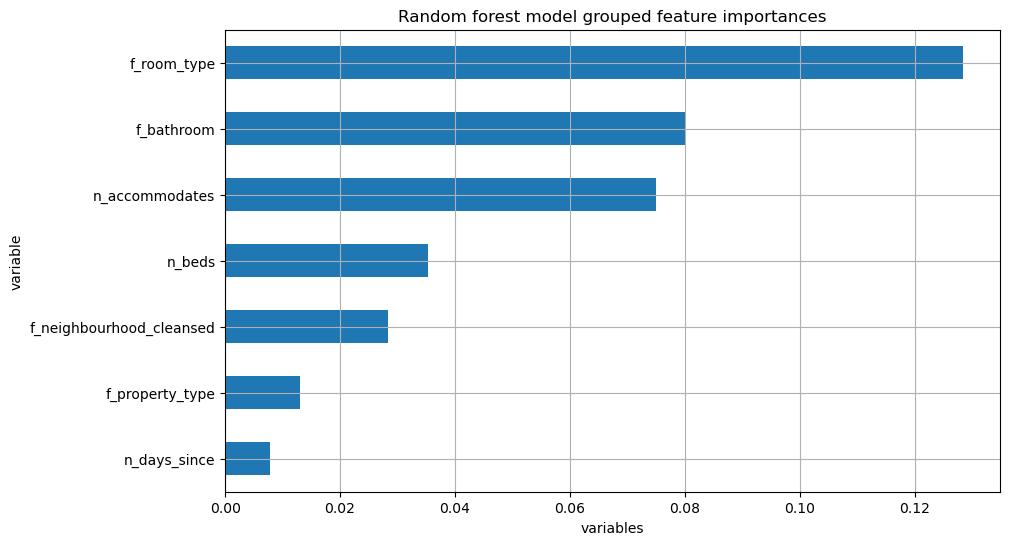

In [88]:
ax = df_grouped_var_imp\
    .sort_values(by = 'imp')\
    .plot(kind = 'barh', 
          x = 'variable', y = 'imp', 
          figsize = (10,6), grid = True, 
          title = 'Random forest model grouped feature importances', 
          xlabel = 'variables', legend = False
         )
#ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals = 0));

In [92]:
## partial dependce plots 
accomodates_pdp = partial_dependence(
    rf_pipeline, data_test[predictors_2], ["n_accommodates"], kind="average"
)

In [93]:
pd.DataFrame(
    {'number of accomodates': accomodates_pdp['values'][0], 
     'average price': accomodates_pdp['average'][0]}
    )

,number of accomodates,average price
0,1,103.020253
1,2,109.263939
2,3,112.639725
3,4,126.404356
4,5,132.801436
5,6,138.352081
6,7,139.601545


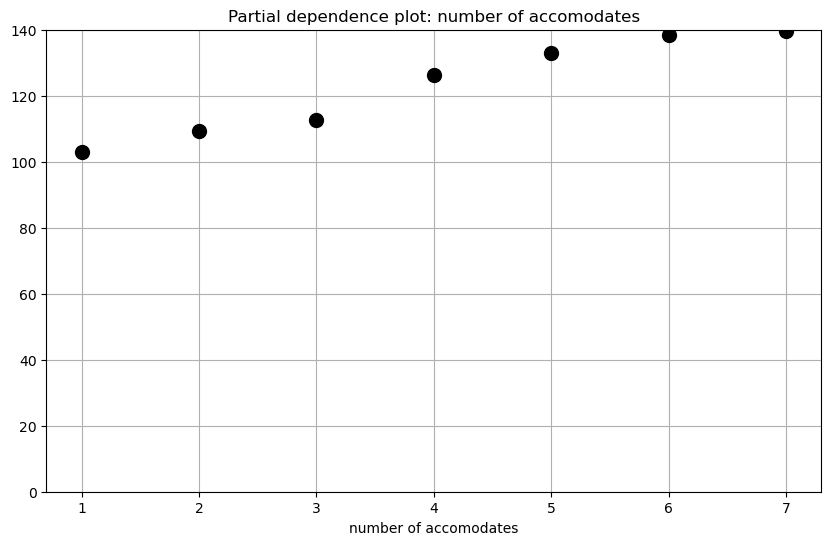

In [94]:
pd.DataFrame(
    {'number of accomodates': accomodates_pdp['values'][0], 
     'average price': accomodates_pdp['average'][0]}
    ).sort_values(by = 'average price').plot(
    kind = 'line', color = 'k', marker = 'o', markersize = 10, linewidth = 0,
    figsize = (10,6), legend = False, grid = True,
    x = 'number of accomodates', y = 'average price', ylim = (0, 140), 
    title = 'Partial dependence plot: number of accomodates'
);

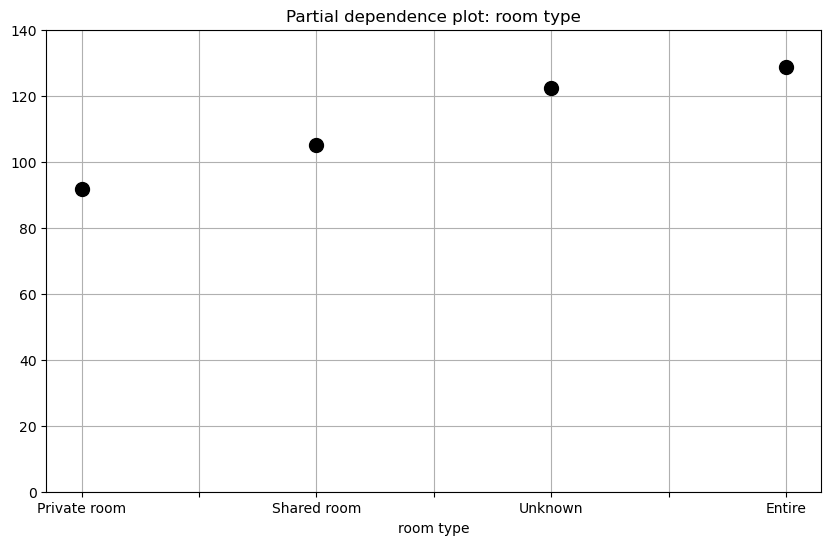

In [97]:
roomtype_pdp = partial_dependence(
    rf_pipeline, data_test[predictors_2], ["f_room_type"], kind="average"
)
pd.DataFrame(
    {'room type': roomtype_pdp['values'][0], 
     'average price': roomtype_pdp['average'][0]}
    ).sort_values(by = 'average price').plot(
    kind = 'line', color = 'k', marker = 'o', markersize = 10, linewidth = 0,
    figsize = (10,6), legend = False, grid = True,
    x = 'room type', y = 'average price', ylim = (0, 140), 
    title = 'Partial dependence plot: room type'
);

In [98]:
#subsample performance 

df_holdout_w_prediction = data_test.assign(
    predicted_price=rf_pipeline.predict(data_test[predictors_2])
)

In [99]:
df_holdout_w_prediction['is_low_size'] = df_holdout_w_prediction.n_accommodates.map(lambda x: 'small apt' if x < 3 else 'large apt')
df_holdout_w_prediction.groupby('is_low_size').apply(lambda x: mean_squared_error(x.predicted_price, x.price, squared=False))


is_low_size
large apt    70.126285
small apt    60.766754
dtype: float64

In [100]:
def calculate_rmse(groupby_obj):
    return (
        groupby_obj.apply(
            lambda x: mean_squared_error(x.predicted_price, x.price, squared=False),
        )
        .to_frame(name="rmse")
        .assign(mean_price=groupby_obj.apply(lambda x: np.mean(x.price)).values)
        .assign(rmse_normalized=lambda x: x.rmse / x.mean_price).round(2)
    )

In [101]:
# cheaper or more expensive flats - not used in book
grouped_object = df_holdout_w_prediction.assign(
    is_low_size=lambda x: np.where(x.n_accommodates <= 3, "small apt", "large apt")
).groupby("is_low_size")
accom_subset = calculate_rmse(grouped_object)

In [102]:
accom_subset

,rmse,mean_price,rmse_normalized
is_low_size,,,
large apt,70.08,161.32,0.43
small apt,62.58,87.07,0.72


In [104]:
# do the neighborhoood part 

In [105]:
grouped_object = df_holdout_w_prediction.loc[
    lambda x: x.f_property_type.isin(["Apartment", "House"])
].groupby("f_property_type")
proptype_subset = calculate_rmse(grouped_object)

proptype_subset.style.format({'rmse': '{:.1f}', 'mean_price': '{:.1f}', 'rmse_normalized': '{:.2f}'})

,rmse,mean_price,rmse_normalized
f_property_type,,,
Apartment,62.1,116.8,0.53
House,76.0,89.8,0.85


In [106]:
all_holdout = pd.DataFrame(
    [
        mean_squared_error(
            df_holdout_w_prediction.price,
            df_holdout_w_prediction.predicted_price,
            squared=False,
        ),
        df_holdout_w_prediction.price.mean(),
    ],
    index=["rmse", "mean_price"],
).T.assign(rmse_normalized=lambda x: x.rmse / x.mean_price).round(2)
all_holdout.index = ["Total"]

all_holdout.style.format({'rmse': '{:.1f}', 'mean_price': '{:.1f}', 'rmse_normalized': '{:.2f}'})

,rmse,mean_price,rmse_normalized
Total,65.6,116.3,0.56


In [107]:
type_rows = pd.DataFrame(
    None,
    index=["Apartment size", "Type", "Borough", "------"],
    columns=["rmse", "mean_price", "rmse_normalized"],
).fillna("------")

In [108]:
pd.concat(
    [
        type_rows.iloc[[0]],
        accom_subset,
        type_rows.iloc[[1]],
        proptype_subset,
        type_rows.iloc[[2]],
        #neightbourhood_subset,
        type_rows.iloc[[3]],
        all_holdout,
    ]
)

,rmse,mean_price,rmse_normalized
Apartment size,------,------,------
large apt,70.08,161.32,0.43
small apt,62.58,87.07,0.72
Type,------,------,------
Apartment,62.13,116.8,0.53
House,75.97,89.78,0.85
Borough,------,------,------
------,------,------,------
Total,65.63,116.32,0.56


## boosting 

In [133]:
from sklearn.ensemble import GradientBoostingRegressor

In [134]:
gbm = GradientBoostingRegressor(learning_rate=0.1, min_samples_split=20, max_features = 10
                                #, n_estimators = 50
                               )

tune_grid = {"n_estimators": [200, 300], "max_depth": [5, 10]}

gbm_model_cv = GridSearchCV(
    gbm,
    tune_grid,
    cv=5,
    scoring="neg_root_mean_squared_error",
    verbose=10,
    n_jobs=-1
)

In [135]:
categorical_columns = [col for col in predictors_2 if col.startswith("f_")]
numerical_columns = [col for col in predictors_2 if col not in categorical_columns]

categorical_encoder = OneHotEncoder(handle_unknown="ignore")

preprocessing = ColumnTransformer(
    [
        ("cat", categorical_encoder, categorical_columns),
        ("num", "passthrough", numerical_columns),
    ]
)

gbm_pipe = Pipeline(
    [("preprocess", preprocessing), ("regressor", gbm_model_cv)], verbose=True
)

In [136]:
%%time
gbm_pipe.fit(data_train[predictors_2],data_train.price)

[Pipeline] ........ (step 1 of 2) Processing preprocess, total=   0.0s
Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 2/5; 1/4] START max_depth=5, n_estimators=200...............................
[CV 1/5; 1/4] START max_depth=5, n_estimators=200...............................
[CV 4/5; 1/4] START max_depth=5, n_estimators=200...............................
[CV 5/5; 1/4] START max_depth=5, n_estimators=200...............................
[CV 3/5; 1/4] START max_depth=5, n_estimators=200...............................
[CV 2/5; 2/4] START max_depth=5, n_estimators=300...............................
[CV 3/5; 2/4] START max_depth=5, n_estimators=300...............................
[CV 1/5; 2/4] START max_depth=5, n_estimators=300...............................
[CV 1/5; 1/4] END max_depth=5, n_estimators=200;, score=-71.988 total time=   1.7s
[CV 5/5; 1/4] END max_depth=5, n_estimators=200;, score=-92.951 total time=   1.7s
[CV 4/5; 2/4] START max_depth=5, n_estimators=300......

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['f_property_type',
                                                   'f_room_type', 'f_bathroom',
                                                   'f_neighbourhood_cleansed']),
                                                 ('num', 'passthrough',
                                                  ['n_accommodates', 'n_beds',
                                                   'n_days_since',
                                                   'n_number_of_reviews',
                                                   'n_review_scores_rating',
                                                   'flag_review_scores_rating',
                                                   'd_contiene_alimentos_nuestro...
                                                   'd_beach_essentials',
                                                   'd_bed_linens',
                                                   'd_beko_frigor_fico_nuevo',
                                                   'd_bidet', 'd_bikes',
                                                   'd_blanca', 'd_blender', ...])])),
                ('regressor',
                 GridSearchCV(cv=5,
                              estimator=GradientBoostingRegressor(max_features=10,
                                                                  min_samples_split=20),
                              n_jobs=-1,
                              param_grid={'max_depth': [5, 10],
                                          'n_estimators': [200, 300]},
                              scoring='neg_root_mean_squared_error',
                              verbose=10))],
         verbose=True)

In [137]:
gbm_model_cv.best_estimator_

GradientBoostingRegressor(max_depth=10, max_features=10, min_samples_split=20,
                          n_estimators=300)

In [138]:
gbm_rmse = gbm_model_cv.best_score_*-1
gbm_rmse

67.38080853007709

In [ ]:
pd.DataFrame({'model': ['OLS', 'LASSO', 'CART', 'random forest', 'GBM'],
              'CV RMSE': [ols_rmse, lasso_rmse, cart_rmse, all_holdout.rmse[0], gbm_rmse]})

# to do:
- do rmse and diagnostics for ols and lasso models 
- finish cart 
- im 95% done with rf, just do the neighbirhood subsample perfomrance and do plots and visusls for var importance 
- do horse race 
- clean up notebook and add comments to code and format 
- add interpretation in markdown cells 
- start with part 2 - already cleaned the data but check it again it might need to be redone 

## part 2: Validation